# Codigo Ejercicio 1
## Integrantes 
*
*
*
*

In [50]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftshift,fftfreq
plt.rcParams.update( { 'font.size':16, 'figure.figsize': (16,9) } )


In [51]:
def calcular_fft( x, N ):
    if( type(N) != int ):
        valores = {
            'Ns': [],
            'X': [],
            'shift_X': [],
            'freq': []
        }
        for N_ in N:
            resultado = calcular_fft( x, N_ )
            valores['X'].append( resultado['X'] )
            valores['shift_X'].append( resultado['shift_X'] )
            valores['freq'].append( resultado['freq'] )
            valores['Ns'].append( N_ )
    
    else:
        n = np.arange( 0, N, 1 )
        X = fft( x(n) ) / N
        freq = fftfreq( N )
        valores = {
            'X': X,
            'shift_X': fftshift( X ),
            'freq': fftshift(freq) 
        }
    
    return valores

## b)

In [52]:
x = lambda n: np.sin( np.pi * n / 4 )
N = 8
X = calcular_fft( x, N )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


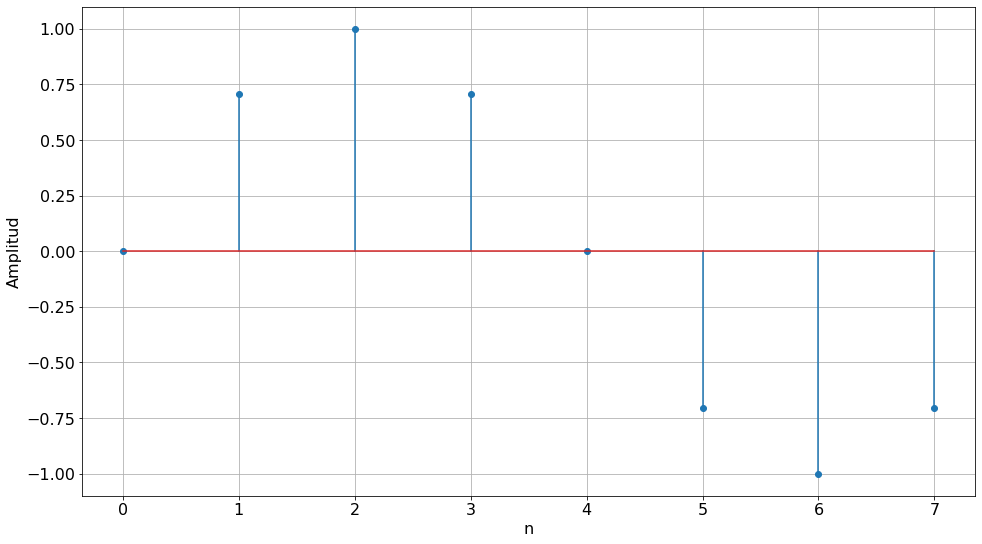

In [53]:
n = np.arange( 0, 8, 1 )
plt.stem( n, x(n) )
plt.grid()
plt.xlabel('n')
plt.ylabel( 'Amplitud' )
plt.savefig( './Img/punto_1_b_signal.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


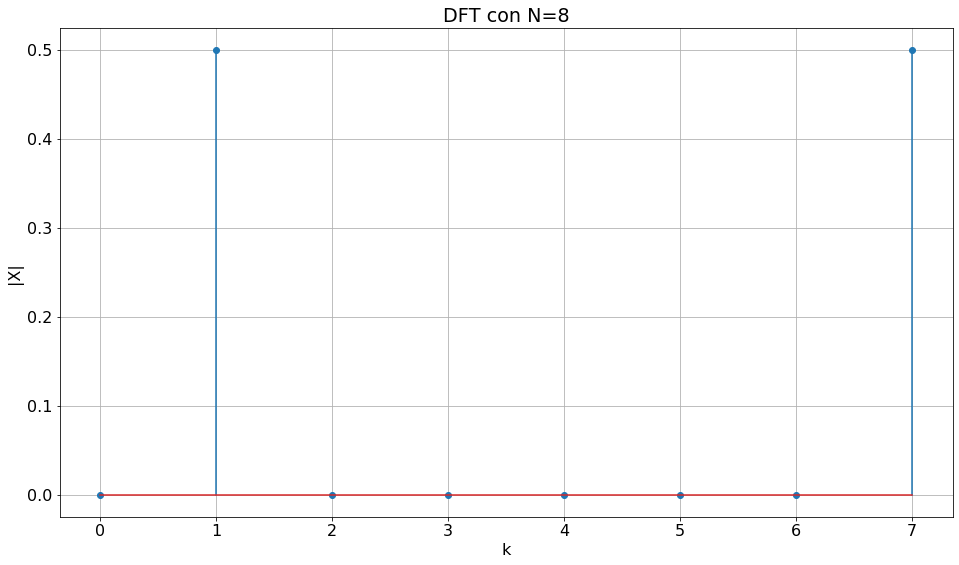

In [54]:
plt.stem( np.abs(X['X']) )
plt.grid()
plt.xlabel( 'k' )
plt.ylabel( '|X|' )
plt.title( f'DFT con N={N}' )
plt.savefig( './Img/punto_1_b.png' )

## c)

In [55]:
N = 9
X = np.abs( calcular_fft( x, N )['X'] )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


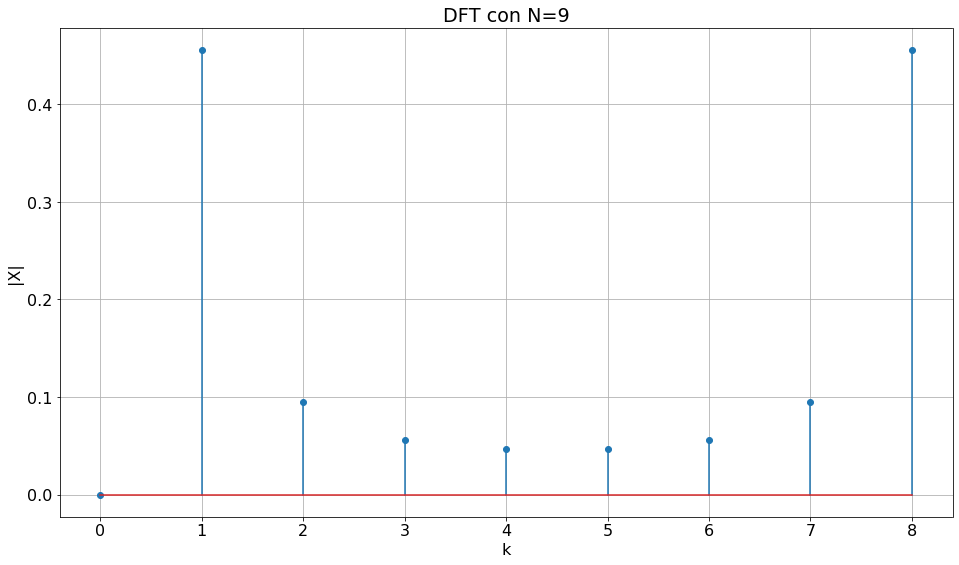

In [56]:
plt.stem( X_mod )
plt.grid()
plt.xlabel( 'k' )
plt.ylabel( '|X|' )
plt.title( f'DFT con N={N}' )
plt.savefig( './Img/punto_1_c.png' )

## d)

In [57]:
Ns = [ 16, 24, 160 ]
transformadas = calcular_fft( x, Ns )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performan

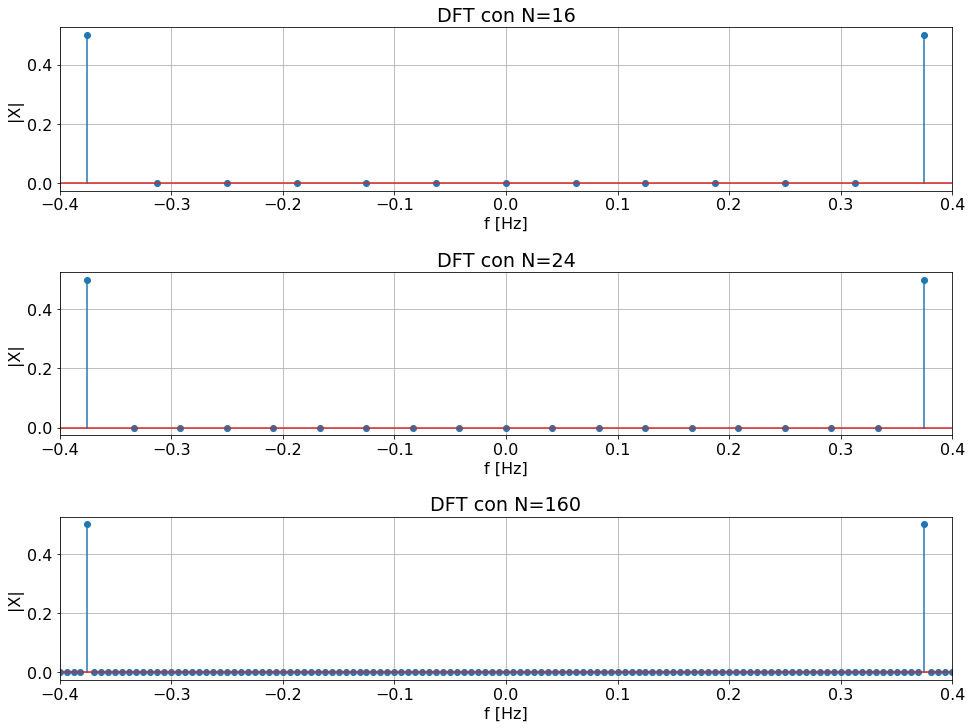

In [58]:
fig = plt.figure( figsize=( 16,12 ) )
plt.subplots_adjust( hspace=.5 )
axs = fig.subplots( len(Ns), 1 )
for i in range( len(Ns) ):
    N = transformadas['Ns'][i]
    axs[i].stem( transformadas['freq'][i] ,np.abs(transformadas['X'][i]) )
    axs[i].set_xlabel( 'f [Hz]' )
    axs[i].grid()
    axs[i].set_xlim( [ -0.4, 0.4 ] )
    axs[i].set_title( f'DFT con N={ N }' )
    axs[i].set_ylabel( '|X|' )
    
plt.savefig( './Img/punto_1_d.png' )

## e)

In [59]:
Ns = [ 17, 25, 161 ]
transformadas = calcular_fft( x, Ns )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performan

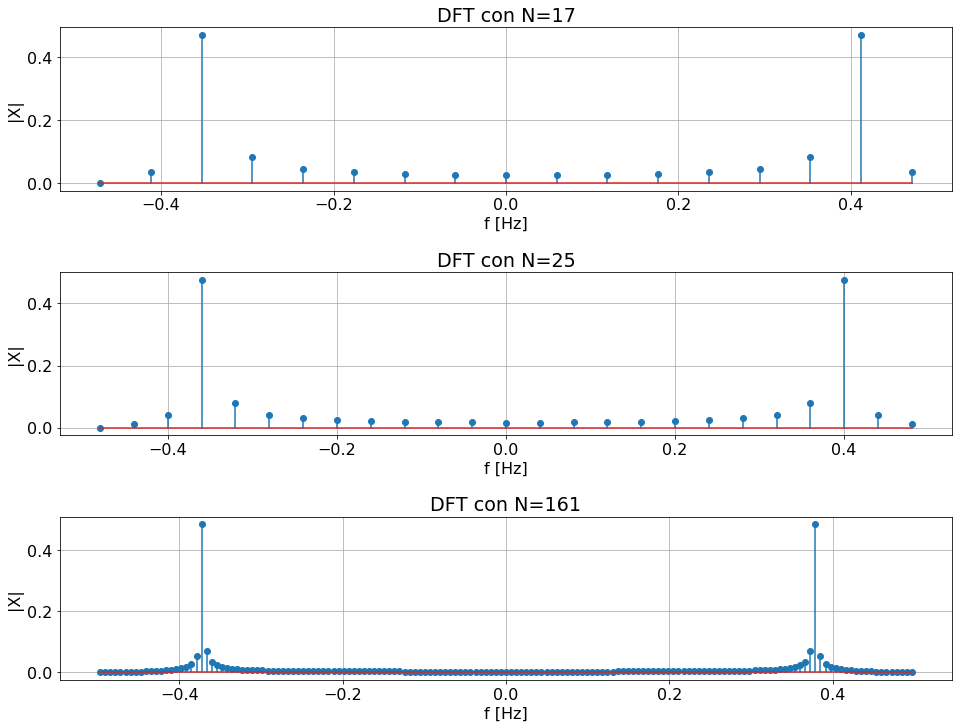

In [60]:
fig = plt.figure( figsize=( 16,12 ) )
plt.subplots_adjust( hspace=.5 )
axs = fig.subplots( 3, 1 )
for i in range( 3 ):
    N = transformadas['Ns'][i]
    axs[i].stem( transformadas['freq'][i] ,np.abs(transformadas['X'][i]) )
    axs[i].set_xlabel( 'f [Hz]' )
    axs[i].grid()
    axs[i].set_title( f'DFT con N={ N }' )
    axs[i].set_ylabel( '|X|' )
plt.savefig( './Img/punto_1_e.png' )

## g)

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


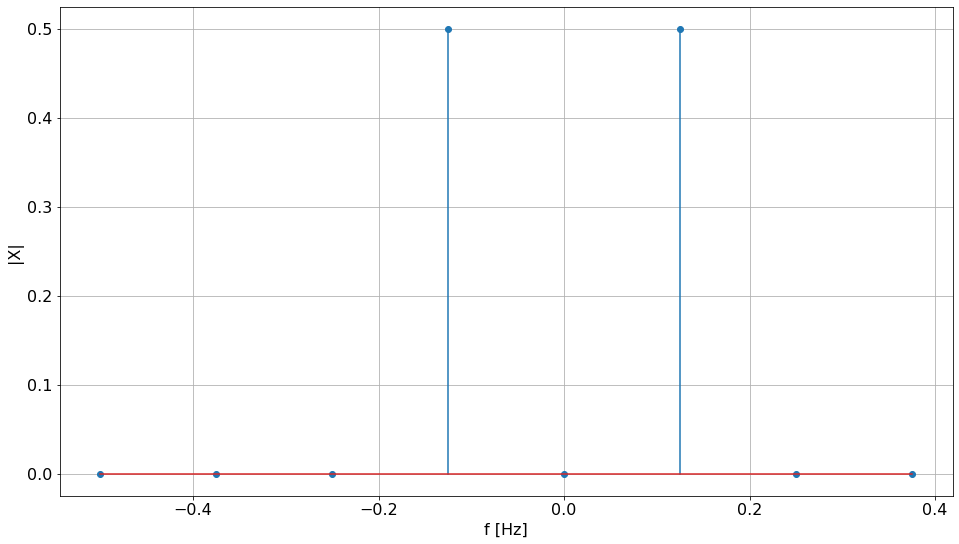

In [61]:
N = 8
X = calcular_fft( x, N )

plt.stem( X['freq'], np.abs(X['shift_X']) )
plt.grid()
plt.xlabel( 'f [Hz]' )
plt.ylabel( '|X|' )
plt.savefig('./Img/punto_1_g_a.png')

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


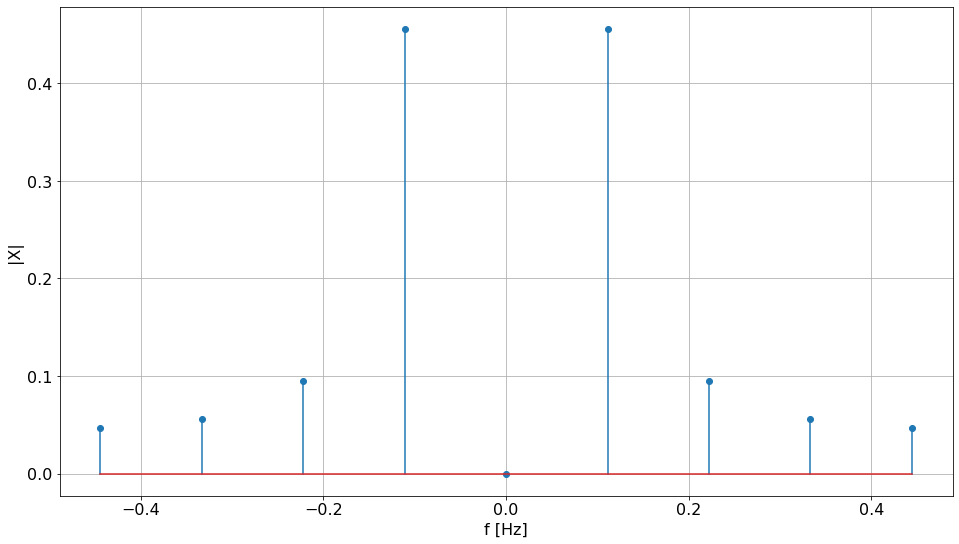

In [68]:
N = 9
X = calcular_fft( x, N )
plt.stem( X['freq'], np.abs(X['shift_X']) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( '|X|' )
plt.grid()
plt.savefig('./Img/punto_1_g_b.png')

## h)

In [63]:
escalon = lambda n: np.piecewise( n, n>-0.10, [1,0] )
delta = lambda n: np.piecewise( n, n==0, [1,0] )

x_1 = lambda n: np.sin( 2* np.pi *n /7 ) + 2 * np.cos( 4 * np.pi * n / 7 ) + 3 * np.sin( 6*np.pi*n/7 )
x_2 = lambda n: np.sum( [escalon( n + 2 - 10*k ) * escalon( 2 - n + 10*k ) for k in range( -100, 100 ) ], axis=0 )
x_3 = lambda n: np.sum( [delta( n - 3 - 20*k ) for k in range( -100, 100 ) ], axis=0 )

In [64]:
def graficar_fft( x, N, path=None ):
    resultado = calcular_fft( x, N )
    X = resultado['shift_X']
    f = resultado['freq']
    
    fig, axs = plt.subplots( 2, 1 )
    axs[0].stem( f, np.abs( X ) )
    axs[0].set_xlabel( 'f [Hz]' )
    axs[0].set_ylabel( '|X|' )
    axs[0].grid()
    axs[1].stem( f, np.angle( X ) )
    axs[1].set_xlabel( 'f [Hz]' )
    axs[1].set_ylabel( 'arg(X)' )
    axs[1].grid()
    if( path ):
        plt.savefig( path )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


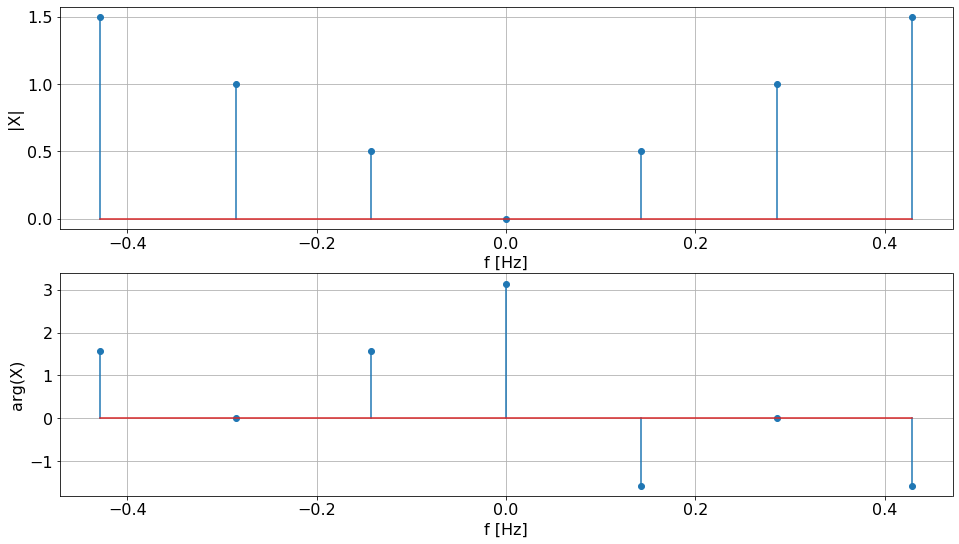

In [65]:
graficar_fft( x_1, 7, './Img/punto_1_h_1.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


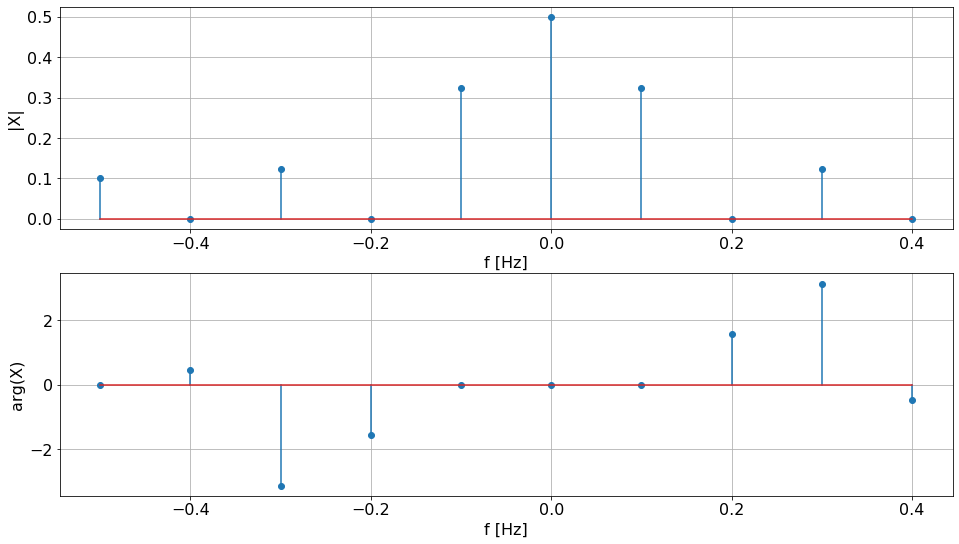

In [66]:
graficar_fft( x_2, 10, './Img/punto_1_h_2.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


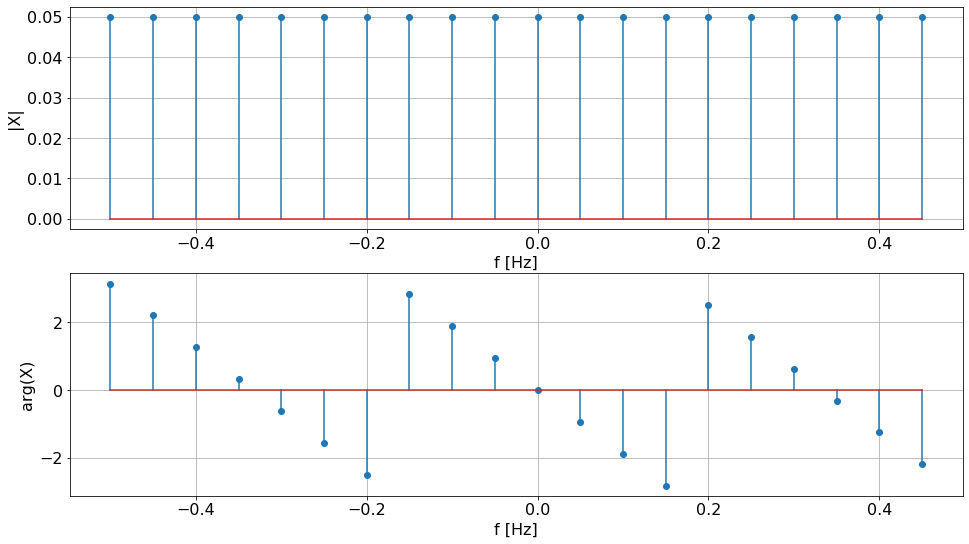

In [67]:
graficar_fft( x_3, 20, './Img/punto_1_h_3.png' )